In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-cic-ids-2018/test/test.csv
/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv


In [2]:
# Define the list of file names
file_names = [
    "/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)

(12639793, 71)


In [3]:
test = pd.read_csv("/kaggle/input/clean-cic-ids-2018/test/test.csv", index_col=False)
test = test.drop(columns='Unnamed: 0')
print(test.shape)

(3159955, 71)


In [4]:
#defining feature lists
feature_list1 = [
    "Dst Port",
    "Fwd Header Len",
    "Fwd IAT Tot",
    "TotLen Fwd Pkts",
    "Bwd Pkts/s",
    "Init Fwd Win Byts",
    "Flow IAT Max",
    "Init Bwd Win Byts",
    "Flow IAT Mean",
    "Fwd IAT Min",
    "Fwd Pkts/s",
    "Fwd IAT Mean",
    "Subflow Fwd Byts",
    "Fwd IAT Max",
    "Date",
    "Time"
]

feature_list2 = [
    "Dst Port",
    "TotLen Fwd Pkts",
    "Fwd Pkt Len Max",
    "Init Fwd Win Byts",
    "Flow IAT Max",
    "Init Bwd Win Byts",
    "Fwd Seg Size Min",
    "Subflow Fwd Byts",
    "Fwd IAT Min",
    "Fwd Pkts/s",
    "Fwd IAT Mean",
    "Fwd IAT Max",
    "Fwd Header Len",
    "Bwd Pkts/s",
    "Fwd IAT Tot",
    "Bwd Header Len",
    "Bwd IAT Max",
    "Pkt Len Var",
    "Flow IAT Mean",
    "Bwd IAT Tot",
    "Date",
    "Flow Duration",
    "Time"
]

In [5]:
cols_to_drop1 = [col for col in df.columns if col not in feature_list1 and col != 'Label']
df.drop(cols_to_drop1, axis=1, inplace=True)
test.drop(cols_to_drop1, axis=1, inplace=True)

cols_to_drop2 = [col for col in df.columns if col not in feature_list2 and col != 'Label']
df.drop(cols_to_drop2, axis=1, inplace=True)
test.drop(cols_to_drop2, axis=1, inplace=True)

In [6]:
X_train1 = df.drop('Label', axis=1)
y_train1 = df['Label']
X_test1 = test.drop('Label', axis=1)
y_test1 = test['Label']

X_train2 = df.drop('Label', axis=1)
y_train2 = df['Label']
X_test2 = test.drop('Label', axis=1)
y_test2 = test['Label']

In [7]:
from xgboost import XGBClassifier

# Calculate class weights
class_weights = len(y_train1) / (6 * np.bincount(y_train1))

# Create the XGBClassifier with class weights
model1 = XGBClassifier(n_jobs=-1)
model2 = XGBClassifier(n_jobs=-1)

# Fit the model with class weights
model1.fit(X_train1, y_train1, sample_weight=class_weights[y_train1])
model2.fit(X_train2, y_train2, sample_weight=class_weights[y_train2])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

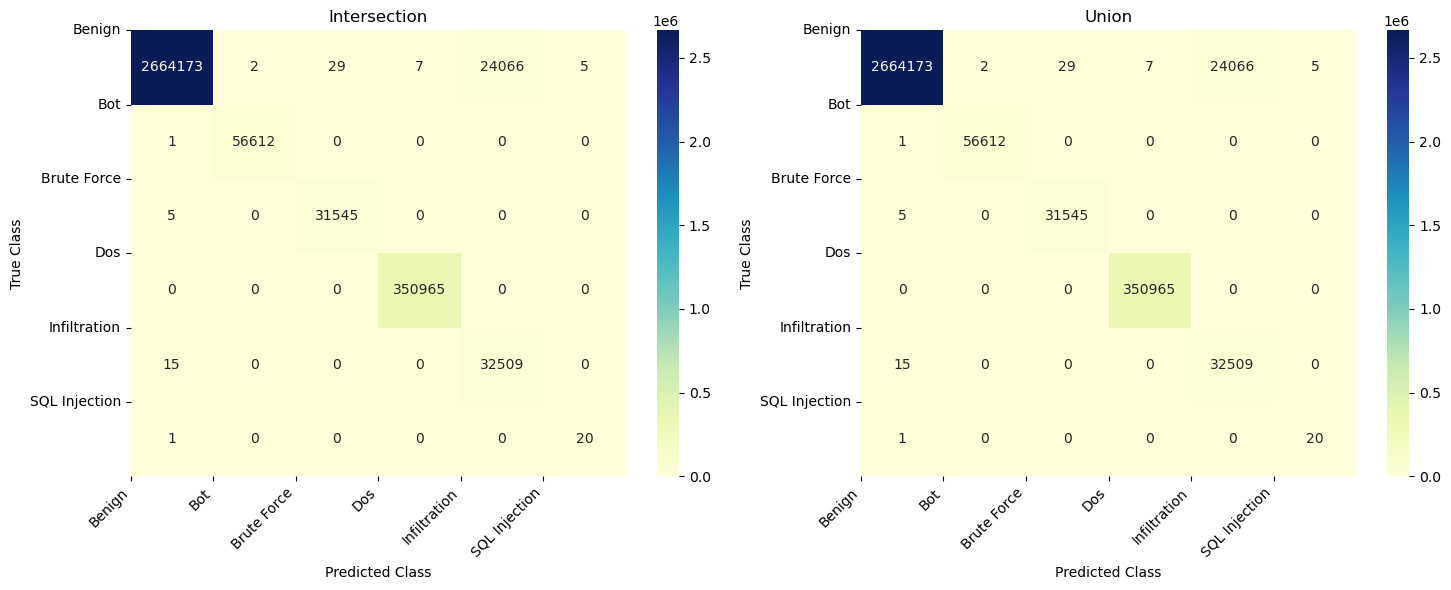

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Get predictions from the best_model
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

# Compute confusion matrices
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create heatmap for cm1
sns.heatmap(cm1, annot=True, cmap="YlGnBu", fmt="d", ax=axes[0])
axes[0].set_xticks(range(len(label_names)))
axes[0].set_yticks(range(len(label_names)))
axes[0].set_xticklabels(label_names, rotation=45, ha='right')
axes[0].set_yticklabels(label_names, rotation=0)
axes[0].set_title("Intersection")
axes[0].set_ylabel("True Class")
axes[0].set_xlabel("Predicted Class")

# Create heatmap for cm2
sns.heatmap(cm2, annot=True, cmap="YlGnBu", fmt="d", ax=axes[1])
axes[1].set_xticks(range(len(label_names)))
axes[1].set_yticks(range(len(label_names)))
axes[1].set_xticklabels(label_names, rotation=45, ha='right')
axes[1].set_yticklabels(label_names, rotation=0)
axes[1].set_title("Union")
axes[1].set_ylabel("True Class")
axes[1].set_xlabel("Predicted Class")

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculating Evaluation Metrics for Model 1
accuracy_model1 = accuracy_score(y_test1, y_pred1)
precision_model1 = precision_score(y_test1, y_pred1, average='weighted')
recall_model1 = recall_score(y_test1, y_pred1, average='weighted')
f1_model1 = f1_score(y_test1, y_pred1, average='weighted')

print("Model 1 Accuracy: ", accuracy_model1)
print("Model 1 Precision: ", precision_model1)
print("Model 1 Recall: ", recall_model1)
print("Model 1 F1 Score: ", f1_model1)
print()

# Calculating Evaluation Metrics for Model 2
accuracy_model2 = accuracy_score(y_test2, y_pred2)
precision_model2 = precision_score(y_test2, y_pred2, average='weighted')
recall_model2 = recall_score(y_test2, y_pred2, average='weighted')
f1_model2 = f1_score(y_test2, y_pred2, average='weighted')

print("Model 2 Accuracy: ", accuracy_model2)
print("Model 2 Precision: ", precision_model2)
print("Model 2 Recall: ", recall_model2)
print("Model 2 F1 Score: ", f1_model2)

Model 1 Accuracy:  0.9923634988472937
Model 1 Precision:  0.9956013587135255
Model 1 Recall:  0.9923634988472937
Model 1 F1 Score:  0.9933749472308391

Model 2 Accuracy:  0.9923634988472937
Model 2 Precision:  0.9956013587135255
Model 2 Recall:  0.9923634988472937
Model 2 F1 Score:  0.9933749472308391


In [10]:
import pickle

Pkl_Filename1 = "XGBoost-intersection.pkl"
Pkl_Filename2 = "XGBoost-union.pkl"

with open(Pkl_Filename1, 'wb') as file:  
    pickle.dump(model1, file)
with open(Pkl_Filename2, 'wb') as file:  
    pickle.dump(model2, file)